In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.svm import SVC

**Zad. 1**

In [ ]:
X, y = datasets.make_blobs(n_samples=50, cluster_std=0.6, random_state=0, centers=2)

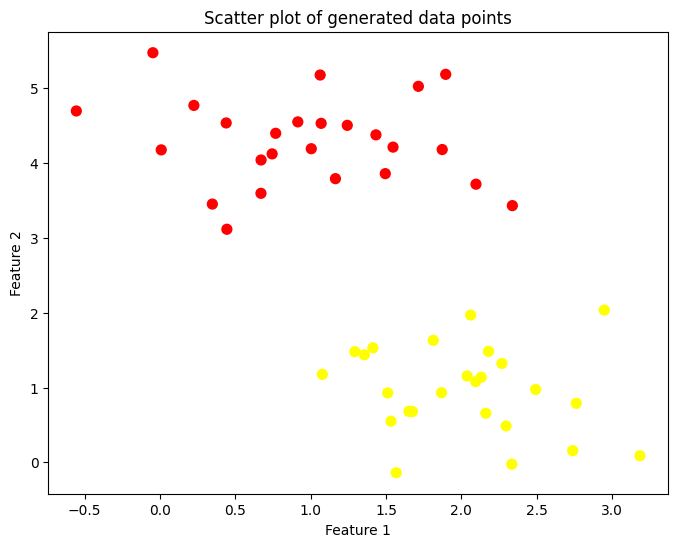

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title("Scatter plot of generated data points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

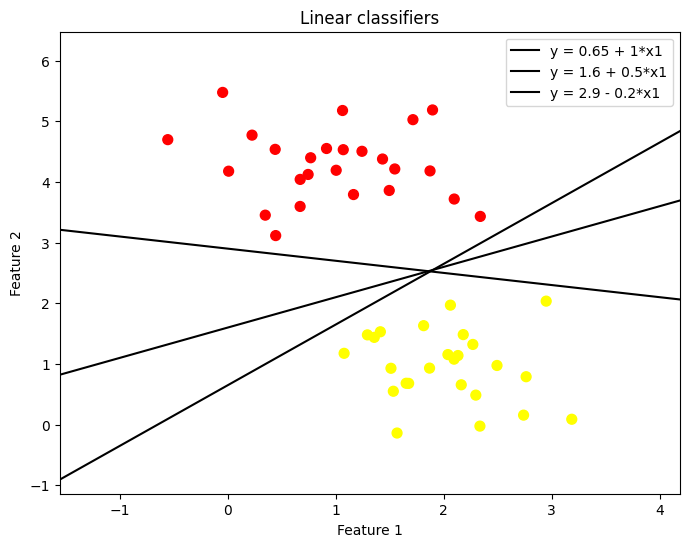

In [ ]:
x_vals = np.linspace(min(X[:, 0]) - 5, max(X[:, 0]) + 5, 100)

# Definicja trzech prostych: y = w0 + w1 * x1
y_vals1 = 0.65 + 1 * x_vals  # Prosta 1: w0 = 0.65, w1 = 1
y_vals2 = 1.6 + 0.5 * x_vals  # Prosta 2: w0 = 1.6, w1 = 0.5
y_vals3 = 2.9 + (-0.2) * x_vals  # Prosta 3: w0 = 2.9, w1 = -0.2

# Rysowanie wykresu z trzema prostymi i punktami danych
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Wykres punktów
plt.plot(x_vals, y_vals1, 'black', label='y = 0.65 + 1*x1')  # Czerwona linia
plt.plot(x_vals, y_vals2, 'black', label='y = 1.6 + 0.5*x1')  # Zielona linia
plt.plot(x_vals, y_vals3, 'black', label='y = 2.9 - 0.2*x1')  # Niebieska linia

# Dodanie legendy i opisów
plt.title("Linear classifiers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)  # Standardowy zakres osi X dla widocznych danych
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)  # Standardowy zakres osi Y dla widocznych danych
plt.legend()
plt.show()

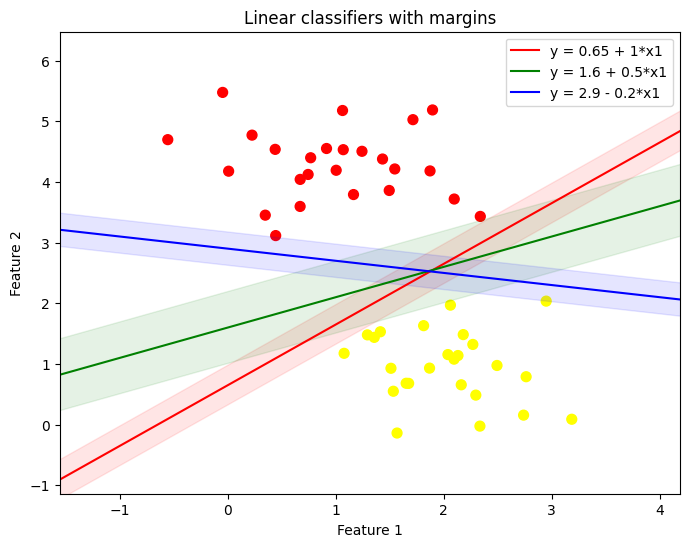

Klasyfikator z największym marginesem to klasyfikator 2 z marginesem 0.5918


In [ ]:
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5  # Rozszerzenie zakresu wartości X (dłuższe linie)
x_vals = np.linspace(x_min, x_max, 100)

# Definicja trzech prostych: y = w0 + w1 * x1
y_vals1 = 0.65 + 1 * x_vals  # Prosta 1: w0 = 0.65, w1 = 1
y_vals2 = 1.6 + 0.5 * x_vals  # Prosta 2: w0 = 1.6, w1 = 0.5
y_vals3 = 2.9 + (-0.2) * x_vals  # Prosta 3: w0 = 2.9, w1 = -0.2

# 1.4 Obliczanie marginesów dla każdej linii
# Używamy cdist, aby obliczyć odległości między punktami a punktami na linii
margin1 = np.min(cdist(X, np.column_stack((x_vals, y_vals1))))
margin2 = np.min(cdist(X, np.column_stack((x_vals, y_vals2))))
margin3 = np.min(cdist(X, np.column_stack((x_vals, y_vals3))))

# Rysowanie wykresu z trzema prostymi, marginesami i punktami danych
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Wykres punktów

# Rysowanie prostych
plt.plot(x_vals, y_vals1, 'r-', label='y = 0.65 + 1*x1')  # Czerwona linia
plt.plot(x_vals, y_vals2, 'g-', label='y = 1.6 + 0.5*x1')  # Zielona linia
plt.plot(x_vals, y_vals3, 'b-', label='y = 2.9 - 0.2*x1')  # Niebieska linia

# Dodawanie marginesów (pasy wokół każdej prostej)
plt.fill_between(x_vals, y_vals1 - margin1, y_vals1 + margin1, color='r', alpha=0.1)
plt.fill_between(x_vals, y_vals2 - margin2, y_vals2 + margin2, color='g', alpha=0.1)
plt.fill_between(x_vals, y_vals3 - margin3, y_vals3 + margin3, color='b', alpha=0.1)

# Dodanie legendy i opisów
plt.title("Linear classifiers with margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)  # Standardowy zakres osi X dla widocznych danych
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)  # Standardowy zakres osi Y dla widocznych danych
plt.legend()

# Wyświetlanie wykresu
plt.show()

# Znalezienie klasyfikatora z największym marginesem
margins = [margin1, margin2, margin3]
best_classifier_index = np.argmax(margins) + 1
print(f"Klasyfikator z największym marginesem to klasyfikator {best_classifier_index} z marginesem {margins[np.argmax(margins)]:.4f}")

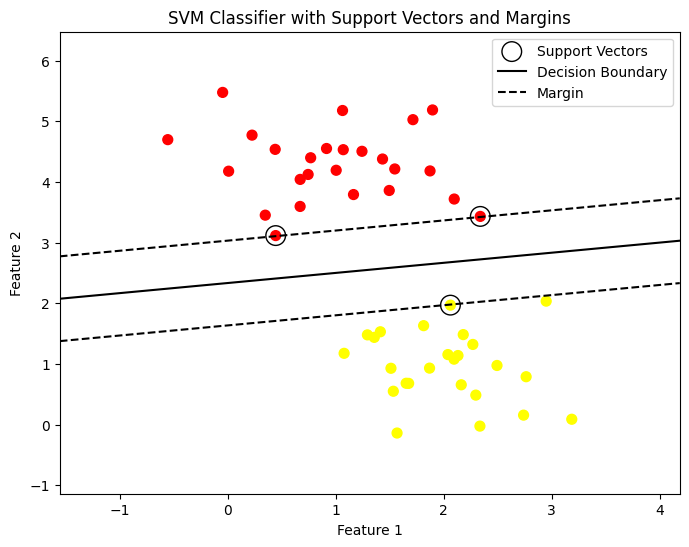

Współrzędne wektorów nośnych:
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


In [ ]:
model_svc = SVC(kernel='linear', C=1e10)
model_svc.fit(X, y)

# Wizualizacja działania modelu SVC
plt.figure(figsize=(8,6))

# Rysowanie punktów danych
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Wyciąganie współrzędnych wektorów nośnych
support_vectors = model_svc.support_vectors_

# Rysowanie wektorów nośnych jako okręgów
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')

# Obliczanie granicy decyzyjnej i marginesów
# Wyciągamy współczynniki modelu (w1, w2) oraz intercept (b)
w = model_svc.coef_[0]
b = model_svc.intercept_[0]

# Funkcja granicy decyzyjnej: w[0] * x1 + w[1] * x2 + b = 0, czyli x2 = -(w[0] * x1 + b) / w[1]
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
decision_boundary = -(w[0] * x_vals + b) / w[1]

# Marginesy: równolegle do granicy decyzyjnej, w odległości 1/||w||
margin = 1 / np.linalg.norm(w)
upper_margin = decision_boundary + margin
lower_margin = decision_boundary - margin

# Rysowanie granicy decyzyjnej i marginesów
plt.plot(x_vals, decision_boundary, 'k-', label='Decision Boundary')
plt.plot(x_vals, upper_margin, 'k--', label='Margin')
plt.plot(x_vals, lower_margin, 'k--')

# Dodanie tytułu i legendy
plt.title("SVM Classifier with Support Vectors and Margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.legend()
plt.show()

# Wypisanie współrzędnych wektorów nośnych
print("Współrzędne wektorów nośnych:")
print(support_vectors)

**Zad. 2**

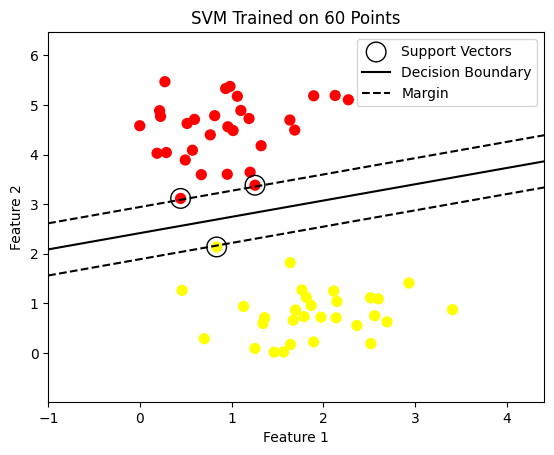

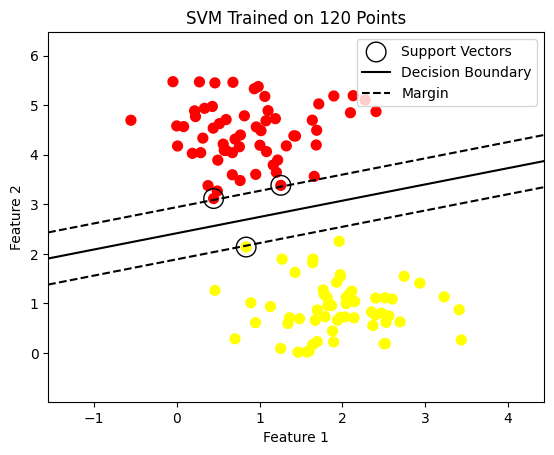

In [ ]:
X, y = datasets.make_blobs(n_samples=200, centers=2, cluster_std=0.60, random_state=0)

# Funkcja do rysowania modelu SVM z wektorami nośnymi
def plot_svm_model(X, y, model, title = ""):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')

    # Obliczanie granicy decyzyjnej i marginesów
    w = model.coef_[0]
    b = model.intercept_[0]
    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    decision_boundary = -(w[0] * x_vals + b) / w[1]
    margin = 1 / np.linalg.norm(w)
    upper_margin = decision_boundary + margin
    lower_margin = decision_boundary - margin

    # Rysowanie granicy decyzyjnej i marginesów
    plt.plot(x_vals, decision_boundary, 'k-', label='Decision Boundary')
    plt.plot(x_vals, upper_margin, 'k--', label='Margin')
    plt.plot(x_vals, lower_margin, 'k--')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    plt.legend()
    plt.show()

# 1. Model na 60 punktach
X_60, y_60 = X[:60], y[:60]  # Pierwsze 60 punktów
model_svc_60 = SVC(kernel='linear', C=1e10)
model_svc_60.fit(X_60, y_60)

# Rysowanie modelu dla 60 punktów
plot_svm_model(X_60, y_60, model_svc_60, "SVM Trained on 60 Points")

# 2. Model na 120 punktach
X_120, y_120 = X[:120], y[:120]  # Pierwsze 120 punktów
model_svc_120 = SVC(kernel='linear', C=1e10)
model_svc_120.fit(X_120, y_120)

# Rysowanie modelu dla 120 punktów
plot_svm_model(X_120, y_120, model_svc_120, "SVM Trained on 120 Points")

**Zad. 3**

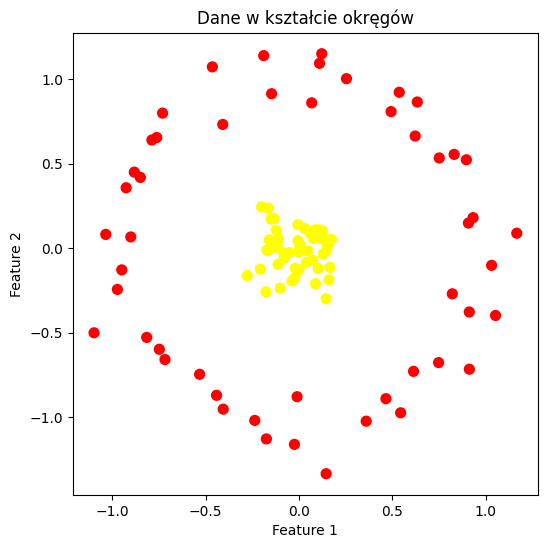

In [ ]:
X, y = datasets.make_circles(n_samples=100, factor=0.1, noise=0.1, random_state=0)

# Rysowanie punktów
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=50)
plt.title("Dane w kształcie okręgów")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# Tworzenie i trenowanie klasyfikatora SVM z jądrem liniowym
clf_svm = SVC(kernel='linear')
clf_svm.fit(X, y)


SVC(kernel='linear')

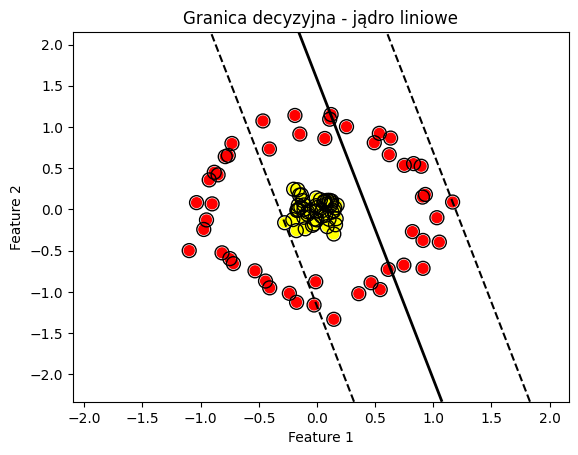

In [ ]:
# Funkcja do rysowania granicy decyzyjnej
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Granica decyzyjna (gdzie decision_function = 0) - czarna linia
    plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)

    # Linie marginesu (gdzie decision_function = ±1) - czarne linie przerywane
    plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='black')

    # Rysowanie punktów danych
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

    # Zaznaczanie wektorów nośnych - czarne okręgi
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='black', linewidths=1, label='Support Vectors')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# def plot_decision_boundary(X, y, model):
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
#     Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])  # decision_function do marginesów
#     Z = Z.reshape(xx.shape)

#     # Granica decyzyjna (gdzie decision_function = 0)
#     plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], alpha=0.8, cmap='autumn')

#     # Linie marginesu (gdzie decision_function = ±1)
#     plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='blue')

#     # Rysowanie punktów danych
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='k')

#     # Zaznaczanie wektorów nośnych
#     support_vectors = model.support_vectors_
#     plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='b', linewidths=1, label='Support Vectors')

#     plt.title("Granica decyzyjna - jądro RBF z marginesami i wektorami nośnymi")
#     plt.xlabel("Feature 1")
#     plt.ylabel("Feature 2")
#     plt.show()

# Rysowanie granicy decyzyjnej dla modelu z jądrem liniowym
plot_decision_boundary(X, y, clf_svm, "Granica decyzyjna - jądro liniowe")


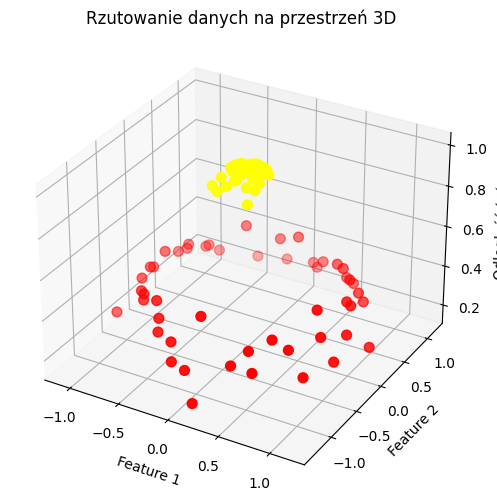

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Obliczanie odległości r dla projekcji w 3D
r = np.exp(-(X ** 2).sum(1))

# Rysowanie wykresu 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], r, c=y, cmap='autumn', s=50)

ax.set_title("Rzutowanie danych na przestrzeń 3D")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Odległość (oś Z)")
plt.show()


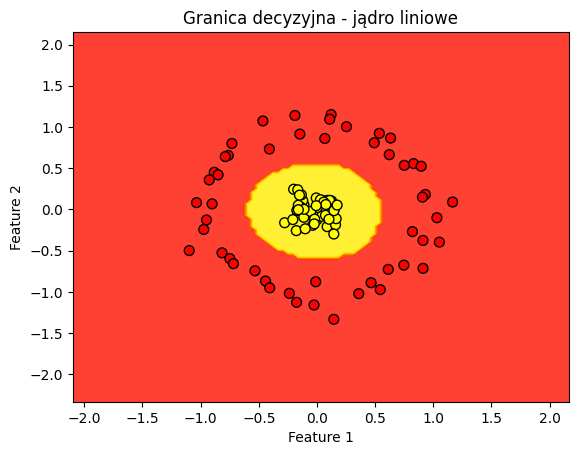

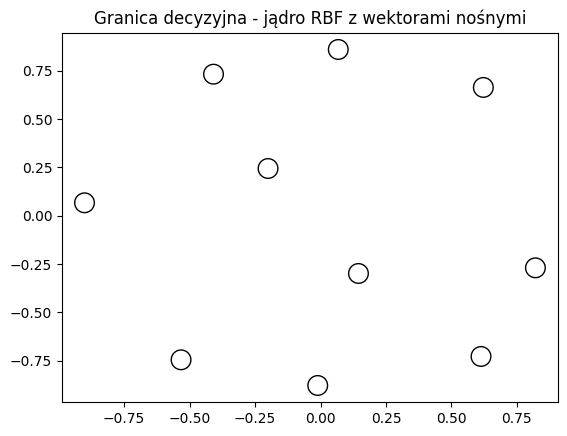

Współrzędne wektorów nośnych:
[[-0.40867925  0.73225992]
 [-0.90136274  0.06675095]
 [ 0.62194713  0.66363424]
 [-0.53262577 -0.74551749]
 [-0.01059175 -0.87830074]
 [ 0.06782759  0.86000564]
 [ 0.82087304 -0.26971282]
 [ 0.61304799 -0.72820082]
 [-0.20035062  0.24428624]
 [ 0.14497035 -0.29878438]]


In [ ]:
# # Tworzenie i trenowanie klasyfikatora SVM z jądrem RBF
# clf_rbf = SVC(kernel='rbf', C=1e3)
# clf_rbf.fit(X, y)

# # Rysowanie granicy decyzyjnej dla modelu z jądrem RBF
# plot_decision_boundary(X, y, clf_rbf)

# # Rysowanie wektorów nośnych
# support_vectors = clf_rbf.support_vectors_
# plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')
# plt.title("Granica decyzyjna - jądro RBF z wektorami nośnymi")
# plt.show()

# # Wypisanie współrzędnych wektorów nośnych
# print("Współrzędne wektorów nośnych:")
# print(support_vectors)


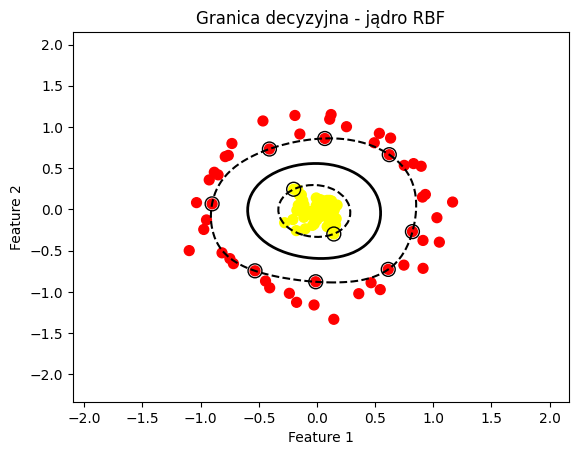

In [ ]:
clf_rbf = SVC(kernel='rbf', C=1e3)
clf_rbf.fit(X, y)

# # Funkcja do rysowania granicy decyzyjnej z wektorami nośnymi
# def plot_decision_boundary(X, y, model):
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
#     Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])  # decision_function do marginesów
#     Z = Z.reshape(xx.shape)

#     # Granica decyzyjna (gdzie decision_function = 0)
#     plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], alpha=0.8, cmap='autumn')

#     # Linie marginesu (gdzie decision_function = ±1)
#     plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='blue')

#     # Rysowanie punktów danych
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='k')

#     # Zaznaczanie wektorów nośnych
#     support_vectors = model.support_vectors_
#     plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='b', linewidths=2, label='Support Vectors')

#     plt.title("Granica decyzyjna - jądro RBF z marginesami i wektorami nośnymi")
#     plt.xlabel("Feature 1")
#     plt.ylabel("Feature 2")
#     plt.show()

# Rysowanie granicy decyzyjnej i wektorów nośnych dla modelu z jądrem RBF
plot_decision_boundary(X, y, clf_rbf, "Granica decyzyjna - jądro RBF")

**Zad. 4**

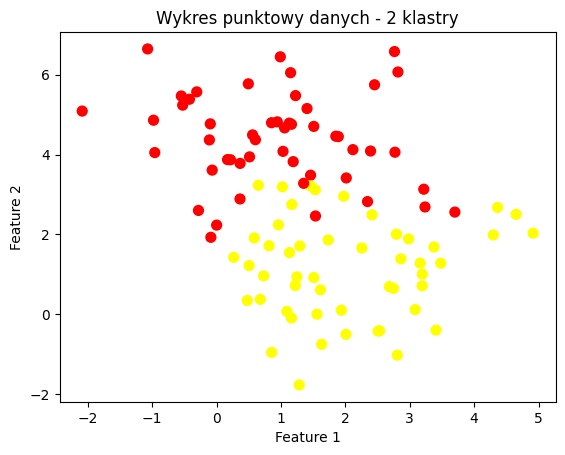

In [ ]:
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.2, random_state=0)

# Wykres punktowy X i y
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title("Wykres punktowy danych - 2 klastry")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

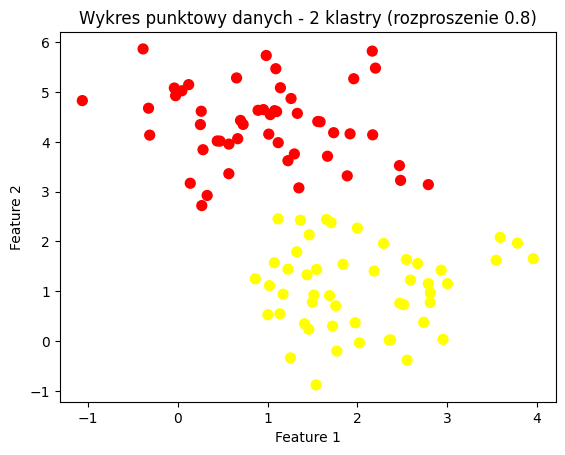

In [ ]:
# Generowanie danych z mniejszym rozproszeniem (cluster_std = 0.8)
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=0.8, random_state=0)

# Wykres nowego zbioru danych
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title("Wykres punktowy danych - 2 klastry (rozproszenie 0.8)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
# Model SVM z jądrem liniowym i C = 0.1
model_low_C = SVC(kernel='linear', C=0.1)
model_low_C.fit(X, y)

# Model SVM z jądrem liniowym i C = 10
model_high_C = SVC(kernel='linear', C=10)
model_high_C.fit(X, y)


SVC(C=10, kernel='linear')

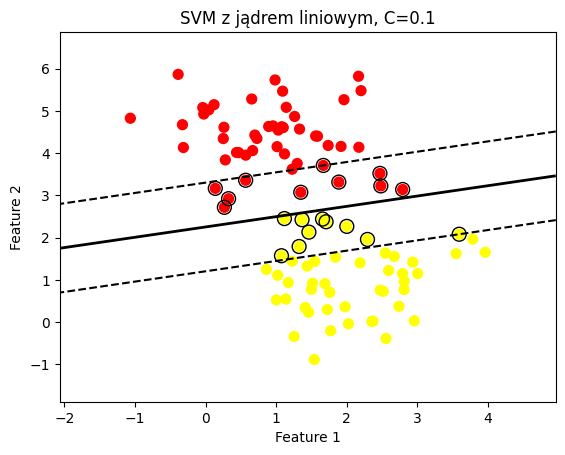

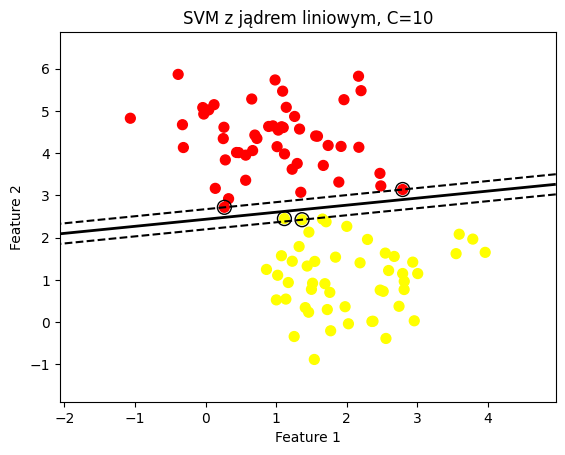

In [ ]:
# Granica decyzyjna i wektory nośne dla modelu z C=0.1
plot_decision_boundary(X, y, model_low_C, "SVM z jądrem liniowym, C=0.1")

# Granica decyzyjna i wektory nośne dla modelu z C=10
plot_decision_boundary(X, y, model_high_C, "SVM z jądrem liniowym, C=10")

**Zad. 5**

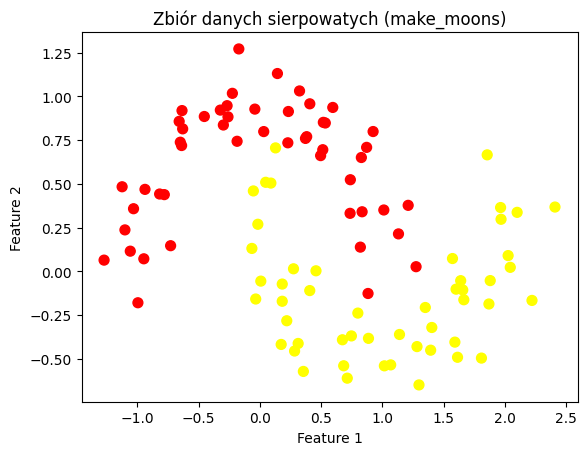

In [ ]:
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

# Wykres punktowy danych
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title("Zbiór danych sierpowatych (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
def plot_decision_boundary2(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Kolorowanie obszaru klas
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  # Tło wyróżnione bez gradientu, 2 kolory

    # Granica decyzyjna (decision boundary)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

    # Rysowanie punktów danych
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='k')

    # Zaznaczanie wektorów nośnych
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='black', linewidths=1, label='Support Vectors')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

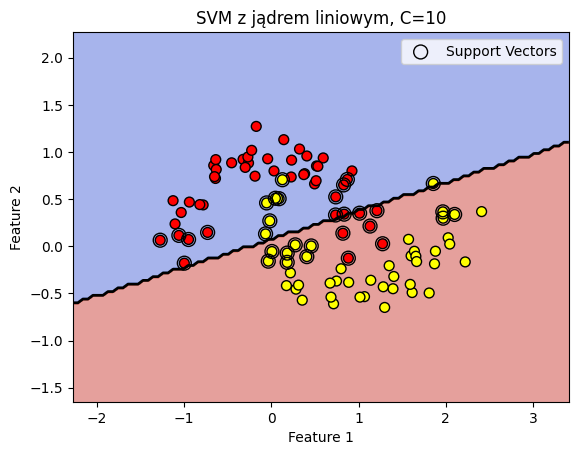

In [ ]:
# Model SVM z jądrem liniowym i C = 10
model_linear = SVC(kernel='linear', C=10)
model_linear.fit(X, y)

# Rysowanie granicy decyzyjnej dla modelu liniowego
plot_decision_boundary2(X, y, model_linear, "SVM z jądrem liniowym, C=10")